# 1. Pulling The Data

## a. Libraries

In [133]:
############### My Variables
gap = 1
history = 3
low_tenure = 1

In [82]:
############### Libraries
%pylab inline
import dataiku
from dataiku import pandasutils as pdu
import pandas as pd
import numpy as np
pd.set_option('mode.chained_assignment', None)
#https://www.dataquest.io/blog/settingwithcopywarning/

import datetime
from datetime import timedelta
import datetime
import seaborn as sns
import re as re
import math
import pickle
import time
import sys
import datetime
#print(sys.version)
import scikitplot as skplt

from matplotlib import pyplot as plt
from math import log
from datetime import datetime, timedelta
from numpy import sort

import scipy.stats as st
import scipy.special as spec

from sklearn.preprocessing import Imputer
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit,StratifiedKFold, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score, log_loss, roc_auc_score, precision_score, recall_score,confusion_matrix, roc_curve, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel

#import scikitplot as skplt

from xgboost import XGBClassifier, plot_importance

import lightgbm as lgb
from lightgbm import LGBMClassifier

import warnings
warnings.filterwarnings("ignore")

Populating the interactive namespace from numpy and matplotlib


In [83]:
############### My Functions
def add_date(month_date, num):
    
    month = month_date%100
    year = int(month_date/100)
    
    if month + num > 0 and month + num <=12:
        new_month = month + num
        new_year = year
    elif month + num <= 0:
        new_month = month + num + 12
        new_year = year -1 
    elif month + num > 12:
        new_month = month + num - 12
        new_year = year + 1
    
    return new_year*100+new_month

def commas(num):
    return '{0:,d}'.format(num)

## b. My Population

In [102]:
# ############### Initial Accounts Table: for each product( cc, edb and other) shows when they were open

# start = time.time()
# account_sum = dataiku.Dataset("account_sum")
# account_sum_df = account_sum.get_dataframe()

# end = time.time()
# print("Dataiku execusion: ", int((end - start)/60), "minutes")

In [103]:
# print(account_sum_df.type.unique().tolist())
# account_sum_df.head()

In [104]:
# # acc_group = accounts_df.groupby(['cad_ip_id', 'type'], as_index = False).min()['open_dt'].head()
# accounts_pivot = account_sum_df.pivot(index='cad_ip_id', columns = 'type', values = 'open_dt')
# accounts_pivot.reset_index(inplace=True)
# accounts_pivot.head()

In [105]:
# print(accounts_pivot.columns)
# accounts_pivot.rename(columns = {'cc   ': 'cc', 'edb  ': 'edb'}, inplace=True)
# print(accounts_pivot.columns)

In [106]:
# accounts_pivot['cc_monthdate'] = pd.DatetimeIndex(accounts_pivot['cc']).year*100+pd.DatetimeIndex(accounts_pivot['cc']).month
# accounts_pivot['edb_monthdate'] = pd.DatetimeIndex(accounts_pivot['edb']).year*100+pd.DatetimeIndex(accounts_pivot['edb']).month

# ### 3 months after getting a credit card
# #accounts_pivot['after_cc'] = accounts_pivot['cc_monthdate'].apply(add_date, num = 3)
# accounts_pivot['after_cc'] = accounts_pivot['cc'] + timedelta(31*(gap+history))
# accounts_pivot['after_cc_monthdate'] = pd.DatetimeIndex(accounts_pivot['after_cc']).year*100+pd.DatetimeIndex(accounts_pivot['after_cc']).month

# accounts_pivot['min_date'] = accounts_pivot[['cc','edb', 'other']].min(axis=1)

# accounts_pivot['tenure']= (accounts_pivot['edb'] - accounts_pivot['min_date']).dt.days
# accounts_pivot.head()

In [107]:
# ##################### Target Population

# # 1. They have to have both edb and credit card
# accounts_target = accounts_pivot.loc[(accounts_pivot['edb'].isnull() == False) 
#                                      & (accounts_pivot['cc'].isnull() == False),:]

# # 2. EDB was open after credit card and other products were open after EDB or not at all
# accounts_target = accounts_target.loc[(accounts_target['cc'] < accounts_target['edb']) 
#                                      & ((accounts_target['other'].isnull()) |
#                                         (accounts_target['other']>=accounts_target['edb']) ),:]

# # 3. EDB was open at least gap+history months after Credit Card
# accounts_target = accounts_target.loc[accounts_target['edb']>accounts_target['after_cc'],:]

# print(accounts_target.shape)
# accounts_target.head()

In [108]:
# #accounts_target.loc[accounts_target['tenure']<=365,].count()
# # 22,764
# # 4,744

# ################################## ONLY LOW TENURE  ##################################

# if low_tenure == 1:
#     accounts_target = accounts_target.loc[accounts_target['tenure']<=365,]


In [109]:
# target_table = accounts_target[['cad_ip_id', 'edb_monthdate']]
# target_table = target_table.rename(columns = {'edb_monthdate': 'target_month'})
# target_table['target_month'] = target_table['target_month'].astype('int')
# target_table.loc[:,'target'] =1
# target_table.head()

In [110]:
# target_table.groupby(['target_month']).count()[['cad_ip_id']]

In [111]:
# counts = target_table.groupby(['target_month']).count()['cad_ip_id']

# months = counts.index.tolist()
# #[item for sublist in counts.values.tolist() for item in sublist]
# numbers = counts.values.tolist() 

In [112]:
# ##################### Non Target Population

# # 1. They have to have only a credit card, and no EDB or other products
# accounts_non_target = accounts_pivot.loc[(accounts_pivot['cc'].isnull() == False) 
#                                              & (accounts_pivot['edb'].isnull() == True)
#                                              & (accounts_pivot['other'].isnull() == True),:]

# print(accounts_non_target.shape)
# accounts_non_target.head()

In [113]:
# non_target_table = pd.DataFrame(columns = ['cad_ip_id', 'target_month'])

In [114]:
# coeff = 9  #9 means we have 9 times more of non-target so 90% of the data will be non target 

# for mnth, num in zip(months, numbers):
#     to_append = accounts_non_target
#     to_append.loc[:,'target_month'] = mnth
    
#     #calculate tenure to only include low tenure 
#     to_append['year'] = round(to_append['target_month']/100,0)
#     to_append['month'] = to_append['target_month']%100
#     to_append['day'] = 1
#     to_append['tenure'] = (pd.to_datetime(to_append[['year','month','day']]) - pd.to_datetime(to_append['min_date'])).astype('timedelta64[D]')

#     if low_tenure ==1:
#         to_append = to_append.loc[(to_append['after_cc_monthdate'] < to_append['target_month']) & (to_append['tenure']<=365),['cad_ip_id', 'target_month']].sample(n = num*coeff)
#     else:
#         to_append = to_append.loc[to_append['after_cc_monthdate'] < to_append['target_month'],['cad_ip_id', 'target_month']].sample(n = num*coeff)

    
#     non_target_table = non_target_table.append(to_append, ignore_index = True)

In [115]:
# non_target_table.loc[:,'target'] =0
# non_target_table.head()

In [116]:
# non_target_table.groupby(['target_month'])[['cad_ip_id']].count()

In [117]:
# overall_population = target_table.append(non_target_table, ignore_index = True)
# overall_population = overall_population.loc[overall_population['target_month']!= 201906,:]

# overall_population['hist_end'] = overall_population['target_month'].apply(add_date, num = -1-gap )
# overall_population['hist_start'] = overall_population['hist_end'].apply(add_date, num = -history+1 )
# overall_population.tail()

In [118]:
# overall_population.groupby(['target']).count()[['cad_ip_id']]

In [119]:
# #overall_population

In [120]:
# start = time.time()
# overall_population = dataiku.Dataset("overall_population")
# overall_population = overall_population.get_dataframe()

# end = time.time()
# print("Dataiku execusion: ", int((end - start)/60), "minutes")

In [121]:
start = time.time()
population_all_tenure = dataiku.Dataset("population_high_tenure")
population_all_tenure = population_all_tenure.get_dataframe()

end = time.time()
print("Dataiku execusion: ", int((end - start)/60), "minutes")

Dataiku execusion:  0 minutes


In [122]:
start = time.time()
population_low_tenure = dataiku.Dataset("population_low_tenure")
population_low_tenure = population_low_tenure.get_dataframe()

end = time.time()
print("Dataiku execusion: ", int((end - start)/60), "minutes")

Dataiku execusion:  0 minutes


In [127]:
population_all_tenure.groupby(['target']).count()[['cad_ip_id']] #/population_all_tenure.count()[['cad_ip_id']]

,cad_ip_id
target,
0.0,199602
1.0,22178


In [130]:
population_low_tenure.groupby(['target']).count()[['cad_ip_id']]#/population_low_tenure.count()[['cad_ip_id']]

,cad_ip_id
target,
0.0,41904
1.0,4656


In [158]:
if low_tenure == 1:
    overall_population = population_low_tenure
else:
    overall_population = population_all_tenure

## c. Customer Data

In [ ]:
# start = time.time()
# customer_data = dataiku.Dataset("customer_data")
# customer_data_df = customer_data.get_dataframe()

# end = time.time()
# print("Dataiku execusion: ", int((end - start)/60), "minutes")

In [131]:
start = time.time()
customer_low = dataiku.Dataset("customer_low")
customer_low_df = customer_low.get_dataframe()

end = time.time()
print("Dataiku execusion: ", int((end - start)/60), "minutes")

Dataiku execusion:  0 minutes


In [132]:
customer_low_df.tail()

,cad_ip_id,ym_id,tnr_mth_nbr,age,gender_cd,city_nm,prov_cd,cntry_cd,FSA,mrtl_st_cd,BMO_grp_empr_cd,TIB_cd,init_pyrl_acct_ind,cr_crd_tot_bal,cr_crd_acct_cnt,NSF_last_6_mth_cnt,OLB_rgst_ind,empr_nm,occptn_cd,mth_indvdl_inc_amt,mth_hshld_inc_amt,cr_crd_ann_rtl_amt,hsg_tnr_typ_cd,self_emp_ind,indvdl_emp_st_typ_cd,new_cdn_ind,cr_crd_prim_acct_cnt,cr_crd_prpaid_ind,cr_crd_FX_txn_ind,cr_crd_gas_spd_amt,cr_crd_tvl_spd_amt,cr_crd_entmt_spd_amt,cr_crd_grocery_spd_amt,cr_crd_cobrwr_ind,stu_ind,forgn_addr_ind,bkrp_ind,preauth_pymt_txn_cnt,preauth_pymt_txn_amt,preauth_cr_crd_pymt_usg_ind,odrft_typ_cd,tot_12m_OPIC_fee_amt,cust_since_dt,last_OLB_login_dt,mbl_login_dt,last_NSF_dt
92914,690533093.0,201903,42.0,47.7,M,MARKHAM,ON,CA,L6C,UN,NaN,B,0.0,3516.16,2.0,0.0,0.0,CANADA FIBERS LIMITED,2001.0,6667.0,0.0,5060.65,NaN,0.0,0.0,0.0,2.0,0.0,1.0,488.36,0.0,931.73,1175.22,NaN,0.0,0.0,0.0,0.0,0.00,1.0,NaN,NaN,2015-10-06 04:00:00,NaT,NaT,2019-02-14 05:00:00
92915,690802139.0,201902,68.0,41.2,F,VAUDREUIL-DORION,QC,CA,J7V,UN,NaN,B,0.0,165.77,2.0,0.0,0.0,DESJARDINS,302.0,6667.0,0.0,0.00,OW,0.0,0.0,0.0,2.0,0.0,1.0,0.00,1260.0,29.85,128.87,NaN,0.0,0.0,0.0,0.0,0.00,0.0,NaN,NaN,2013-06-22 04:00:00,2017-07-06 04:00:00,NaT,NaT
92916,691433802.0,201902,45.0,36.9,NaN,TORONTO,ON,CA,M4E,UN,NaN,B,0.0,14.63,1.0,0.0,0.0,DOCTOR NUSINOFF DENTAL,2401.0,6667.0,0.0,3759.30,NaN,0.0,0.0,0.0,1.0,0.0,1.0,43.87,0.0,47.24,370.75,NaN,0.0,0.0,0.0,0.0,0.00,0.0,NaN,NaN,2015-05-15 04:00:00,NaT,NaT,NaT
92917,691917595.0,201903,298.0,64.7,NaN,THUNDER BAY,ON,CA,P7E,UN,NaN,B,0.0,94.62,2.0,0.0,0.0,SYKESATHOME,1501.0,2333.0,0.0,0.00,RE,0.0,1.0,0.0,2.0,0.0,0.0,0.00,0.0,0.00,174.53,NaN,0.0,0.0,0.0,1.0,107.35,1.0,NaN,NaN,1994-06-07 04:00:00,NaT,NaT,2019-03-04 05:00:00
92918,692148072.0,201903,5.0,21.4,M,ETOBICOKE,ON,CA,M9P,UN,NaN,B,0.0,0.00,1.0,0.0,0.0,SHOPPERS DRUG MART,1502.0,2500.0,15000.0,0.00,NaN,0.0,1.0,0.0,1.0,0.0,0.0,0.00,0.0,0.00,0.00,NaN,0.0,0.0,0.0,0.0,0.00,0.0,NaN,NaN,2018-11-16 05:00:00,NaT,NaT,NaT


In [135]:
if low_tenure == 1:
    customer_data_df = customer_low_df
else:
    customer_data_df = customer_high_df

In [136]:
customer_data_filtered = customer_data_df.groupby(['cad_ip_id']).filter(lambda x: len(x)==history)

old_count = customer_data_df.count()[1]
new_count = customer_data_filtered.count()[1]

print('By selecting customers with full', history,'months of history we reduced data from', 
      old_count, 'to', new_count, 'observations (by', round((old_count-new_count)*100/old_count,1),'%)' )

By selecting customers with full 3 months of history we reduced data from 92919 to 76368 observations (by 17.8 %)


In [138]:
customer_data_filtered.head()

,cad_ip_id,ym_id,tnr_mth_nbr,age,gender_cd,city_nm,prov_cd,cntry_cd,FSA,mrtl_st_cd,BMO_grp_empr_cd,TIB_cd,init_pyrl_acct_ind,cr_crd_tot_bal,cr_crd_acct_cnt,NSF_last_6_mth_cnt,OLB_rgst_ind,empr_nm,occptn_cd,mth_indvdl_inc_amt,mth_hshld_inc_amt,cr_crd_ann_rtl_amt,hsg_tnr_typ_cd,self_emp_ind,indvdl_emp_st_typ_cd,new_cdn_ind,cr_crd_prim_acct_cnt,cr_crd_prpaid_ind,cr_crd_FX_txn_ind,cr_crd_gas_spd_amt,cr_crd_tvl_spd_amt,cr_crd_entmt_spd_amt,cr_crd_grocery_spd_amt,cr_crd_cobrwr_ind,stu_ind,forgn_addr_ind,bkrp_ind,preauth_pymt_txn_cnt,preauth_pymt_txn_amt,preauth_cr_crd_pymt_usg_ind,odrft_typ_cd,tot_12m_OPIC_fee_amt,cust_since_dt,last_OLB_login_dt,mbl_login_dt,last_NSF_dt
0,883.0,201712,154.0,34.4,F,LEVIS,QC,CA,G6J,UN,NaN,B,0.0,5531.53,1.0,0.0,0.0,NaN,NaN,1500.0,0.0,34208.17,RF,0.0,NaN,0.0,1.0,0.0,0.0,837.00,1960.32,216.73,4020.70,NaN,0.0,0.0,0.0,0.0,0.00,0.0,NaN,NaN,2005-02-18 05:00:00,NaT,NaT,NaT
1,883.0,201801,155.0,34.4,F,LEVIS,QC,CA,G6J,UN,NaN,B,0.0,3855.09,1.0,0.0,0.0,NaN,NaN,1500.0,0.0,34208.17,RF,0.0,NaN,0.0,1.0,0.0,0.0,884.31,1960.32,202.78,3582.13,NaN,0.0,0.0,0.0,0.0,0.00,0.0,NaN,NaN,2005-02-18 05:00:00,NaT,NaT,NaT
2,883.0,201802,156.0,34.5,F,LEVIS,QC,CA,G6J,UN,NaN,B,0.0,3229.32,1.0,0.0,0.0,NaN,NaN,1500.0,0.0,34503.79,RF,0.0,NaN,0.0,1.0,0.0,0.0,948.31,1960.32,190.85,4163.87,NaN,0.0,0.0,0.0,0.0,0.00,0.0,NaN,NaN,2005-02-18 05:00:00,NaT,NaT,NaT
4,10430.0,201801,279.0,59.2,F,EDMONTON,AB,CA,T6X,UN,NaN,B,0.0,9220.14,1.0,0.0,0.0,TEAM INDUSTRAL SERVICES,2201.0,0.0,0.0,10057.60,OW,0.0,0.0,0.0,1.0,0.0,1.0,0.00,0.00,360.60,0.00,NaN,0.0,0.0,0.0,2.0,78.03,1.0,NaN,NaN,1994-11-07 05:00:00,NaT,NaT,2018-01-29 05:00:00
5,10430.0,201802,280.0,59.2,F,EDMONTON,AB,CA,T6X,UN,NaN,B,0.0,9272.66,1.0,0.0,0.0,TEAM INDUSTRAL SERVICES,2201.0,0.0,0.0,9834.80,OW,0.0,0.0,0.0,1.0,0.0,1.0,0.00,0.00,0.00,0.00,NaN,0.0,0.0,0.0,2.0,140.89,1.0,NaN,NaN,1994-11-07 05:00:00,NaT,NaT,2018-02-26 05:00:00


## d. Accounts Data

In [ ]:
# start = time.time()
# account_data = dataiku.Dataset("account_data")
# account_data_df = account_data.get_dataframe()

# end = time.time()
# print("Dataiku execusion: ", int((end - start)/60), "minutes")

In [139]:
start = time.time()
accounts_low = dataiku.Dataset("accounts_low")
accounts_low_df = accounts_low.get_dataframe()

end = time.time()
print("Dataiku execusion: ", int((end - start)/60), "minutes")

Dataiku execusion:  0 minutes


In [ ]:
start = time.time()
accounts_high = dataiku.Dataset("accounts_high")
accounts_high_df = accounts_high.get_dataframe()

end = time.time()
print("Dataiku execusion: ", int((end - start)/60), "minutes")

In [140]:
if low_tenure == 1:
    account_data_df = accounts_low_df
else:
    account_data_df = accounts_high_df

In [141]:
#### Before calculating averaging accounts for a customer, let's fix the data

score_variables = ['algnd_TRIAD_scr', 'cr_scr']
for var in score_variables:
    account_data_df.loc[account_data_df[var] == 0, var] = np.NaN

In [142]:
#this data might countain several accounts for one customer and one month
account_data_grouped = account_data_df.groupby(['cad_ip_id', 'ym_id']).mean()
account_data_grouped.reset_index(inplace=True)

In [143]:
account_data_grouped.head()

,cad_ip_id,ym_id,cad_acct_id,algnd_TRIAD_scr,CL_amt,orig_CL_amt,cr_scr,auth_amt,cash_lim_amt,crn_bal,prev_stmt_bal,high_bal,YTD_pymt_amt,YTD_pymt_cnt,CTD_pymt_amt,CTD_pymt_cnt,YTD_FCHG_amt,YTD_pur_amt,YTD_pur_cnt,YTD_cash_cnt,YTD_cash_amt,cash_amt,cash_cnt,chq_amt,chq_cnt,pymt_amt,pymt_cnt,pur_amt,pur_cnt,pur_int_rate,ADB_amt,ann_rtl_spd_amt,tot_crd_cnt
0,883.0,201712,234907989.0,766.0,16500.0,0.0,770.0,21.77,16500.0,5531.53,5033.65,14322.92,39597.11,23.0,0.0,0.0,872.39,34285.32,465.0,0.0,0.0,0.0,0.0,0.0,0.0,3000.00,2.0,5452.10,60.0,19.99,4666.39,34208.17,2.0
1,883.0,201801,234907989.0,774.0,16500.0,0.0,770.0,17.28,16500.0,3855.09,2737.68,14322.92,5033.65,2.0,0.0,0.0,0.00,3357.21,43.0,0.0,0.0,0.0,0.0,0.0,0.0,5033.65,2.0,3357.21,43.0,19.99,3435.01,34503.79,2.0
2,883.0,201802,234907989.0,774.0,16500.0,0.0,770.0,40.05,16500.0,3229.32,3189.27,14322.92,7771.33,3.0,0.0,0.0,0.00,5469.12,71.0,0.0,0.0,0.0,0.0,0.0,0.0,2737.68,1.0,2111.91,28.0,19.99,2766.37,33426.09,2.0
3,5509.0,201709,234907508.0,718.0,18000.0,0.0,703.0,40.00,18000.0,15642.44,17720.69,17758.20,3750.00,10.0,2000.0,1.0,1450.06,2244.49,40.0,0.0,0.0,0.0,0.0,0.0,0.0,2200.00,2.0,230.29,3.0,11.90,17513.17,2417.81,1.0
4,5509.0,201710,234907508.0,747.0,18000.0,0.0,703.0,38.59,18000.0,16045.49,15947.61,17758.20,3750.00,10.0,0.0,0.0,1617.21,2480.39,45.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,235.90,5.0,11.90,15880.19,2614.22,1.0


In [144]:
########## Check: Did your grouping work properly? 

#account_data_df.groupby(['cad_ip_id', 'ym_id']).count()
#account_data_df.loc[account_data_df['cad_ip_id']==46375, ] 
#account_data_grouped.loc[account_data_grouped['cad_ip_id']==46375,]

In [145]:
account_data_filtered = account_data_grouped.groupby(['cad_ip_id']).filter(lambda x: len(x)==history)

old_count = account_data_grouped.count()[1]
new_count = account_data_filtered.count()[1]

print('By selecting customers with full', history,'months of history we reduced data from', 
      old_count, 'to', new_count, 'observations (by', round((old_count -new_count)*100/old_count,1),'%)' )

By selecting customers with full 3 months of history we reduced data from 117990 to 109107 observations (by 7.5 %)


## e. Equifax Data

In [146]:
start = time.time()
equifax_low = dataiku.Dataset("equifax_low")
equifax_low_df = equifax_low.get_dataframe()

end = time.time()
print("Dataiku execusion: ", int((end - start)/60), "minutes")

Dataiku execusion:  0 minutes


In [ ]:
start = time.time()
equifax_high = dataiku.Dataset("equifax_high")
equifax_high_df = equifax_high.get_dataframe()

end = time.time()
print("Dataiku execusion: ", int((end - start)/60), "minutes")

In [173]:
if low_tenure == 1:
    equifax_data_df = equifax_low_df
else:
    equifax_data_df = equifax_high_df

In [174]:
#this data might countain several equifax ids for one customer and one month
equifax_data_grouped = equifax_data_df.groupby(['cad_ip_id', 'hist_end']).mean()
equifax_data_grouped.reset_index(inplace=True)
equifax_data_grouped = equifax_data_grouped.drop('hist_end',1) 

In [175]:
equifax_data_grouped.head()

,cad_ip_id,inq_3mth_nbr,inq_6mth_nbr,inquiry_12mth_nbr,inq_24mth_nbr,last_inq_mths,BR_open_trades_nbr,BR_tot_open_bal,BR_open_util,BR_last_open_MOB,BR_90_120DPD_ever_trd_nbr,BR_pstd_trd_nbr,BR_90_120DPD_trd_nbr,BR_30DPD_12mth_trd_nbr,BR_open_bal_gt0_trd_nbr,BR_worst_rtg,NC_open_trades_nbr,NC_tot_open_bal,NC_open_util,NC_last_open_MOB,NC_30DPD_trd_nbr,NC_60DPD_trd_nbr,NC_worst_rtg,NC_reprt_24mth_trd_nbr,RD_open_trades_nbr,RD_tot_open_bal,RD_open_util,RD_last_open_MOB,active_trades_util_0to4_bal_amt,active_trades_util_5to49_bal_amt,active_trades_util_50to69_bal_amt,active_trades_util_70to89_bal_amt,active_trades_util_90above_bal_amt,BMO_bal,nonBMO_bal,BMO_SOW,clct_inq_nbr,fin_inq_nbr,inq_nbr,LC_avg_bal,LC_top_util,LC_tot_bal,LC_tot_CL,top1_util_mthly_pymt,top2_util_mthly_pymt,SOW_BMO_mtg_inq_3_mth_nbr,SOW_BMO_crd_inq_3_mth_nbr,SOW_BMO_loan_inq_3_mth_nbr,SOW_BIG4_mtg_inq_3_mth_nbr,SOW_BIG4_crd_inq_3_mth_nbr,SOW_BIG4_loan_inq_3_mth_nbr,SOW_othr_bank_mtg_inq_3_mth_nbr,SOW_othr_bank_crd_inq_3_mth_nbr,SOW_othr_bank_loan_inq_3_mth_nbr,SOW_BMO_crd_open_3_mth_trd_nbr,SOW_BMO_crd_bal_GT_0_trd_nbr,SOW_BMO_crd_tot_open_trd_bal,SOW_BMO_crd_tot_open_trd_CL,SOW_BMO_crd_open_trd_top_bal,SOW_BMO_crd_open_trd_lwst_NZ_bal
0,883.0,0.0,0.0,1.0,2.0,9.0,2.0,2737.0,14.0,18.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,2737.0,14.0,18.0,0.0,0.0,1.0,2.0,0.0,NaN,NaN,NaN,0.0,2737.0,0.0,24385.0,0.0,2737.0,0.0,1.000000,0.0,1.0,2.0,NaN,NaN,NaN,NaN,394.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2737.0,16500.0,2737.0,2737.0
1,10430.0,0.0,0.0,1.0,5.0,12.0,4.0,18113.0,66.0,43.0,0.0,0.0,0.0,0.0,4.0,1.0,2.0,14955.0,81.0,43.0,0.0,0.0,1.0,3.0,0.0,NaN,NaN,315.0,0.0,3158.0,0.0,23815.0,5976.0,8979.0,5976.0,0.600401,0.0,1.0,7.0,1579.0,40.0,3158.0,9000.0,110.0,200.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,8979.0,12400.0,8979.0,8979.0
2,25538.0,0.0,0.0,1.0,1.0,8.0,3.0,2348.0,8.0,8.0,0.0,0.0,0.0,0.0,1.0,1.0,3.0,2348.0,8.0,8.0,0.0,0.0,1.0,5.0,0.0,NaN,NaN,NaN,0.0,2348.0,0.0,0.0,0.0,2348.0,0.0,1.000000,0.0,0.0,2.0,NaN,NaN,0.0,NaN,10.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2348.0,25000.0,2348.0,2348.0
3,31212.0,0.0,0.0,0.0,1.0,13.0,6.0,34883.0,66.0,22.0,0.0,0.0,0.0,0.0,5.0,1.0,6.0,34883.0,66.0,22.0,0.0,0.0,1.0,6.0,0.0,NaN,NaN,NaN,0.0,735.0,5512.0,0.0,28636.0,552.0,34331.0,0.015824,0.0,0.0,1.0,NaN,NaN,NaN,NaN,162.0,41.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,552.0,1000.0,552.0,552.0
4,106981.0,0.0,0.0,1.0,1.0,10.0,1.0,807.0,8.0,10.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,807.0,8.0,10.0,0.0,0.0,1.0,4.0,0.0,NaN,NaN,NaN,0.0,807.0,0.0,0.0,0.0,807.0,NaN,NaN,0.0,0.0,1.0,NaN,NaN,NaN,NaN,10.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,807.0,10000.0,807.0,807.0


## f. Combining All Data

In [176]:
print(' Initial Population:' ,'{0:,d}'.format(overall_population['cad_ip_id'].nunique()), '\n',
      'Customer Data:', '{0:,d}'.format(customer_data_filtered['cad_ip_id'].nunique()), '\n',
      'Accounts Data: ', '{0:,d}'.format(account_data_filtered['cad_ip_id'].nunique()), '\n',
      'Equifax Data: ', '{0:,d}'.format(equifax_data_grouped['cad_ip_id'].nunique()))

 Initial Population: 44,743 
 Customer Data: 25,456 
 Accounts Data:  36,369 
 Equifax Data:  24,539


In [191]:
all_data = overall_population.merge(customer_data_filtered, on = 'cad_ip_id').merge(account_data_filtered, on = ['cad_ip_id', 'ym_id']).merge(equifax_data_grouped, on = ['cad_ip_id'])
print('Overall Population:' ,'{0:,d}'.format(all_data['cad_ip_id'].nunique()))

Overall Population: 22,519


In [192]:
all_data.groupby(['target'])[['cad_ip_id']].nunique()

,cad_ip_id
target,
0.0,20190
1.0,2329


# 2. Data Preparation

In [193]:
all_data.head()

,cad_ip_id,target_month,target,hist_end,hist_start,ym_id,tnr_mth_nbr,age,gender_cd,city_nm,prov_cd,cntry_cd,FSA,mrtl_st_cd,BMO_grp_empr_cd,TIB_cd,init_pyrl_acct_ind,cr_crd_tot_bal,cr_crd_acct_cnt,NSF_last_6_mth_cnt,OLB_rgst_ind,empr_nm,occptn_cd,mth_indvdl_inc_amt,mth_hshld_inc_amt,cr_crd_ann_rtl_amt,hsg_tnr_typ_cd,self_emp_ind,indvdl_emp_st_typ_cd,new_cdn_ind,cr_crd_prim_acct_cnt,cr_crd_prpaid_ind,cr_crd_FX_txn_ind,cr_crd_gas_spd_amt,cr_crd_tvl_spd_amt,cr_crd_entmt_spd_amt,cr_crd_grocery_spd_amt,cr_crd_cobrwr_ind,stu_ind,forgn_addr_ind,bkrp_ind,preauth_pymt_txn_cnt,preauth_pymt_txn_amt,preauth_cr_crd_pymt_usg_ind,odrft_typ_cd,tot_12m_OPIC_fee_amt,cust_since_dt,last_OLB_login_dt,mbl_login_dt,last_NSF_dt,cad_acct_id,algnd_TRIAD_scr,CL_amt,orig_CL_amt,cr_scr,auth_amt,cash_lim_amt,crn_bal,prev_stmt_bal,high_bal,YTD_pymt_amt,YTD_pymt_cnt,CTD_pymt_amt,CTD_pymt_cnt,YTD_FCHG_amt,YTD_pur_amt,YTD_pur_cnt,YTD_cash_cnt,YTD_cash_amt,cash_amt,cash_cnt,chq_amt,chq_cnt,pymt_amt,pymt_cnt,pur_amt,pur_cnt,pur_int_rate,ADB_amt,ann_rtl_spd_amt,tot_crd_cnt,inq_3mth_nbr,inq_6mth_nbr,inquiry_12mth_nbr,inq_24mth_nbr,last_inq_mths,BR_open_trades_nbr,BR_tot_open_bal,BR_open_util,BR_last_open_MOB,BR_90_120DPD_ever_trd_nbr,BR_pstd_trd_nbr,BR_90_120DPD_trd_nbr,BR_30DPD_12mth_trd_nbr,BR_open_bal_gt0_trd_nbr,BR_worst_rtg,NC_open_trades_nbr,NC_tot_open_bal,NC_open_util,NC_last_open_MOB,NC_30DPD_trd_nbr,NC_60DPD_trd_nbr,NC_worst_rtg,NC_reprt_24mth_trd_nbr,RD_open_trades_nbr,RD_tot_open_bal,RD_open_util,RD_last_open_MOB,active_trades_util_0to4_bal_amt,active_trades_util_5to49_bal_amt,active_trades_util_50to69_bal_amt,active_trades_util_70to89_bal_amt,active_trades_util_90above_bal_amt,BMO_bal,nonBMO_bal,BMO_SOW,clct_inq_nbr,fin_inq_nbr,inq_nbr,LC_avg_bal,LC_top_util,LC_tot_bal,LC_tot_CL,top1_util_mthly_pymt,top2_util_mthly_pymt,SOW_BMO_mtg_inq_3_mth_nbr,SOW_BMO_crd_inq_3_mth_nbr,SOW_BMO_loan_inq_3_mth_nbr,SOW_BIG4_mtg_inq_3_mth_nbr,SOW_BIG4_crd_inq_3_mth_nbr,SOW_BIG4_loan_inq_3_mth_nbr,SOW_othr_bank_mtg_inq_3_mth_nbr,SOW_othr_bank_crd_inq_3_mth_nbr,SOW_othr_bank_loan_inq_3_mth_nbr,SOW_BMO_crd_open_3_mth_trd_nbr,SOW_BMO_crd_bal_GT_0_trd_nbr,SOW_BMO_crd_tot_open_trd_bal,SOW_BMO_crd_tot_open_trd_CL,SOW_BMO_crd_open_trd_top_bal,SOW_BMO_crd_open_trd_lwst_NZ_bal
0,350223.0,201904.0,1.0,201902.0,201812.0,201812,500.0,78.4,M,LASALLE,QC,CA,H8N,UN,NaN,B,0.0,75.16,1.0,0.0,0.0,RETRAITE,2201.0,2250.0,1100.0,2809.45,OW,0.0,4.0,0.0,1.0,0.0,0.0,185.66,0.0,0.00,712.76,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1977-05-09 04:00:00,NaT,NaT,NaT,424221664.0,749.0,6000.0,6000.0,399.0,596.15,6000.0,75.16,596.14,843.99,2959.32,9.0,596.15,1.0,0.00,3108.91,75.0,0.0,0.0,0.0,0.0,0.0,0.0,596.15,1.0,299.46,7.0,19.99,495.22,3108.91,2.0,0.0,0.0,1.0,2.0,9.0,3.0,1633.0,7.0,9.0,0.0,0.0,0.0,0.0,3.0,1.0,3.0,1633.0,7.0,9.0,0.0,0.0,1.0,7.0,0.0,NaN,NaN,423.0,479.0,1154.0,0.0,0.0,0.0,255.0,1378.0,0.156154,0.0,0.0,3.0,NaN,NaN,NaN,NaN,10.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,255.0,6000.0,255.0,255.0
1,350223.0,201904.0,1.0,201902.0,201812.0,201901,501.0,78.4,M,LASALLE,QC,CA,H8N,UN,NaN,B,0.0,241.34,1.0,0.0,0.0,RETRAITE,2201.0,2250.0,1100.0,3108.91,OW,0.0,4.0,0.0,1.0,0.0,0.0,167.67,0.0,0.00,618.77,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1977-05-09 04:00:00,NaT,NaT,NaT,424221664.0,754.0,6000.0,6000.0,399.0,23.00,6000.0,264.34,255.48,843.99,255.48,1.0,255.48,1.0,0.00,444.66,10.0,0.0,0.0,0.0,0.0,0.0,0.0,255.48,1.0,444.66,10.0,19.99,191.45,3553.57,2.0,0.0,0.0,1.0,2.0,9.0,3.0,1633.0,7.0,9.0,0.0,0.0,0.0,0.0,3.0,1.0,3.0,1633.0,7.0,9.0,0.0,0.0,1.0,7.0,0.0,NaN,NaN,423.0,479.0,1154.0,0.0,0.0,0.0,255.0,1378.0,0.156154,0.0,0.0,3.0,NaN,NaN,NaN,NaN,10.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,255.0,6000.0,255.0,255.0
2,350223.0,201904.0,1.0,201902.0,201812.0,201902,502.0,78.5,M,LASALLE,QC,CA,H8N,UN,NaN,B,0.0,598.67,1.0,0.0,0.0,RETRAITE,2201.0,2250.0,1100.0,3553.57,OW,0.0,4.0,0.0,1.0,0.0,0.0,107.02,0.0,0.00,565.98,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1977-05-09 04:00:00,NaT,NaT,NaT,424221664.0,754.0,6000.0,60

## a. Variable Manipulation

In [194]:
################################ ALL VARIABLES ################################

variables_all = list(all_data)

In [195]:
################################ NULL VARIABLES ################################

variables_contain_null = list()
for variable in variables_all:
    if all_data[variable].isnull().sum() > 0:
        variables_contain_null.append(variable)
        
percent_missing = round(all_data[variables_contain_null].isnull().sum()/all_data[variables_contain_null].isnull().count()*100,2)
variables_missing = percent_missing[percent_missing>30].keys().tolist()

variables_null = [x for x in variables_contain_null if x not in variables_missing ]
#percent_missing[variables_null]

In [196]:
################################ DROP VARIABLES ################################

variables_to_drop = variables_missing + ['cad_acct_id']

for variable in variables_to_drop:
    all_data = all_data.drop(variable,1) 

In [197]:
################################ Fill NAs ################################

variables_obj = all_data.select_dtypes(include = ['object', 'O']).columns.tolist()
variables_num = all_data.select_dtypes(include = ['float64']).columns.tolist()

for variable in variables_num:
    all_data[variable].fillna(all_data[variable].mean(), inplace=True)
    
for variable in variables_obj:
    all_data[variable].fillna(all_data[variable].mode(), inplace=True)

In [198]:
variables_obj

['city_nm', 'prov_cd', 'cntry_cd', 'FSA', 'mrtl_st_cd', 'TIB_cd']

In [199]:
################################ DATE VARIABLES ################################

variables_dates = all_data.select_dtypes(include = ['datetime']).columns.tolist()

for variable in variables_dates:
    new_variable = 'since_' + variable
    
    all_data['year'] = round(all_data['hist_end']/100,0)
    all_data['month'] = all_data['hist_end']%100
    all_data['day'] = 1
    
    all_data[new_variable] = (pd.to_datetime(all_data[['year','month','day']]) - pd.to_datetime(all_data[variable])).astype('timedelta64[D]')
    
    all_data = all_data.drop('year',1)
    all_data = all_data.drop('month',1)
    all_data = all_data.drop('day',1)
    
    all_data = all_data.drop(variable,1) 

In [200]:
################################ TOO MANY LEVELS VARIABLES ################################

variables_obj = all_data.select_dtypes(include = ['object', 'O']).columns.tolist()
variables_num = all_data.select_dtypes(include = ['float64']).columns.tolist()

unique_counts = all_data[variables_obj].nunique()
variables_many_levels = unique_counts[unique_counts>200].keys().tolist()

variables_to_drop = variables_many_levels

for variable in variables_to_drop:
    all_data = all_data.drop(variable,1)
    
#variables_obj = [x for x in variables_obj if x not in variables_to_drop]
variables_obj = all_data.select_dtypes(include = ['object', 'O']).columns.tolist()
variables_num = all_data.select_dtypes(include = ['float64']).columns.tolist()

In [201]:
unique_counts[variables_obj]

prov_cd       13
cntry_cd       1
mrtl_st_cd     7
TIB_cd         1
dtype: int64

In [202]:
## Add
all_data[['month']] = all_data[['hist_end']]%100

In [203]:
#### Provinces
provinces = all_data.groupby(['prov_cd']).count()['target'].sort_values(ascending = False)
big_provinces = provinces[provinces>1000].keys().tolist()
all_data.loc[all_data['prov_cd'].isin(big_provinces) == False, 'prov_cd'] = 'OTH'

#### Countries
countries = all_data.groupby(['cntry_cd']).count()['target'].sort_values(ascending = False)
big_countries = countries[countries>=100].keys().tolist()
all_data.loc[all_data['cntry_cd'].isin(big_countries) == False, 'cntry_cd'] = 'OTH'

# #### Occupations
# occupations = all_data.groupby(['occptn_cd']).count()['target'].sort_values(ascending = False)
# big_occupations = occupations[occupations>=500].keys().tolist()
# all_data.loc[all_data['occptn_cd'].isin(big_occupations) == False, 'occptn_cd'] = 'OTH'

In [204]:
# change all indicators to be categorical variables except the response
all_variables = list(all_data)
all_variables = [x for x in all_variables if x not in ['cntry_cd', 'mth_indvdl_inc_amt', 'target']] 
to_type = 'object'
for variable in all_variables:
    if 'ind' in variable or variable in ['occptn_cd', 'month']:
        all_data.loc[:,variable] = all_data[variable].astype(to_type)

In [205]:
all_data.head()

,cad_ip_id,target_month,target,hist_end,hist_start,ym_id,tnr_mth_nbr,age,prov_cd,cntry_cd,mrtl_st_cd,TIB_cd,init_pyrl_acct_ind,cr_crd_tot_bal,cr_crd_acct_cnt,NSF_last_6_mth_cnt,OLB_rgst_ind,mth_indvdl_inc_amt,mth_hshld_inc_amt,cr_crd_ann_rtl_amt,self_emp_ind,new_cdn_ind,cr_crd_prim_acct_cnt,cr_crd_prpaid_ind,cr_crd_FX_txn_ind,cr_crd_gas_spd_amt,cr_crd_tvl_spd_amt,cr_crd_entmt_spd_amt,cr_crd_grocery_spd_amt,stu_ind,forgn_addr_ind,bkrp_ind,preauth_pymt_txn_cnt,preauth_pymt_txn_amt,preauth_cr_crd_pymt_usg_ind,algnd_TRIAD_scr,CL_amt,orig_CL_amt,cr_scr,auth_amt,cash_lim_amt,crn_bal,prev_stmt_bal,high_bal,YTD_pymt_amt,YTD_pymt_cnt,CTD_pymt_amt,CTD_pymt_cnt,YTD_FCHG_amt,YTD_pur_amt,YTD_pur_cnt,YTD_cash_cnt,YTD_cash_amt,cash_amt,cash_cnt,chq_amt,chq_cnt,pymt_amt,pymt_cnt,pur_amt,pur_cnt,pur_int_rate,ADB_amt,ann_rtl_spd_amt,tot_crd_cnt,inq_3mth_nbr,inq_6mth_nbr,inquiry_12mth_nbr,inq_24mth_nbr,last_inq_mths,BR_open_trades_nbr,BR_tot_open_bal,BR_open_util,BR_last_open_MOB,BR_90_120DPD_ever_trd_nbr,BR_pstd_trd_nbr,BR_90_120DPD_trd_nbr,BR_30DPD_12mth_trd_nbr,BR_open_bal_gt0_trd_nbr,BR_worst_rtg,NC_open_trades_nbr,NC_tot_open_bal,NC_open_util,NC_last_open_MOB,NC_30DPD_trd_nbr,NC_60DPD_trd_nbr,NC_worst_rtg,NC_reprt_24mth_trd_nbr,RD_open_trades_nbr,active_trades_util_0to4_bal_amt,active_trades_util_5to49_bal_amt,active_trades_util_50to69_bal_amt,active_trades_util_70to89_bal_amt,active_trades_util_90above_bal_amt,BMO_bal,nonBMO_bal,clct_inq_nbr,fin_inq_nbr,inq_nbr,top1_util_mthly_pymt,top2_util_mthly_pymt,SOW_BMO_mtg_inq_3_mth_nbr,SOW_BMO_crd_inq_3_mth_nbr,SOW_BMO_loan_inq_3_mth_nbr,SOW_BIG4_mtg_inq_3_mth_nbr,SOW_BIG4_crd_inq_3_mth_nbr,SOW_BIG4_loan_inq_3_mth_nbr,SOW_othr_bank_mtg_inq_3_mth_nbr,SOW_othr_bank_crd_inq_3_mth_nbr,SOW_othr_bank_loan_inq_3_mth_nbr,SOW_BMO_crd_open_3_mth_trd_nbr,SOW_BMO_crd_bal_GT_0_trd_nbr,SOW_BMO_crd_tot_open_trd_bal,SOW_BMO_crd_tot_open_trd_CL,SOW_BMO_crd_open_trd_top_bal,since_cust_since_dt,month
0,350223.0,201904.0,1.0,201902.0,201812.0,201812,500.0,78.4,QC,CA,UN,B,0,75.16,1.0,0.0,0,2250.0,1100.0,2809.45,0,0,1.0,0,0,185.66,0.0,0.00,712.76,0,0,0,0.0,0.0,0,749.0,6000.0,6000.0,399.000000,596.15,6000.0,75.16,596.14,843.99,2959.32,9.0,596.15,1.0,0.00,3108.91,75.0,0.0,0.0,0.0,0.0,0.0,0.0,596.15,1.0,299.46,7.0,19.99,495.22,3108.91,2.0,0.0,0.0,1.0,2.0,9.0,3.0,1633.0,7.0,9.0,0.0,0.0,0.0,0.0,3.0,1.0,3.0,1633.0,7.0,9.0,0.0,0.0,1.0,7.0,0.0,479.0,1154.0,0.0,0.0,0.0,255.0,1378.000000,0.0,0.0,3.0,10.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,255.0,6000.0,255.0,15242.0,2
1,350223.0,201904.0,1.0,201902.0,201812.0,201901,501.0,78.4,QC,CA,UN,B,0,241.34,1.0,0.0,0,2250.0,1100.0,3108.91,0,0,1.0,0,0,167.67,0.0,0.00,618.77,0,0,0,0.0,0.0,0,754.0,6000.0,6000.0,399.000000,23.00,6000.0,264.34,255.48,843.99,255.48,1.0,255.48,1.0,0.00,444.66,10.0,0.0,0.0,0.0,0.0,0.0,0.0,255.48,1.0,444.66,10.0,19.99,191.45,3553.57,2.0,0.0,0.0,1.0,2.0,9.0,3.0,1633.0,7.0,9.0,0.0,0.0,0.0,0.0,3.0,1.0,3.0,1633.0,7.0,9.0,0.0,0.0,1.0,7.0,0.0,479.0,1154.0,0.0,0.0,0.0,255.0,1378.000000,0.0,0.0,3.0,10.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,255.0,6000.0,255.0,15242.0,2
2,350223.0,201904.0,1.0,201902.0,201812.0,201902,502.0,78.5,QC,CA,UN,B,0,598.67,1.0,0.0,0,2250.0,1100.0,3553.57,0,0,1.0,0,0,107.02,0.0,0.00,565.98,0,0,0,0.0,0.0,0,754.0,6000.0,6000.0,399.000000,24.00,6000.0,598.67,494.79,843.99,255.48,1.0,0.00,0.0,0.00,778.99,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,334.33,8.0,19.99,436.81,3887.90,2.0,0.0,0.0,1.0,2.0,9.0,3.0,1633.0,7.0,9.0,0.0,0.0,0.0,0.0,3.0,1.0,3.0,1633.0,7.0,9.0,0.0,0.0,1.0,7.0,0.0,479.0,1154.0,0.0,0.0,0.0,255.0,1378.000000,0.0,0.0,3.0,10.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,255.0,6000.0,255.0,15242.0,2
3,727026.0,201805.0,1.0,201803.0,201801.0,201801,280.0,40.3,ON,CA,UN,B,0,18068.89,1.0,0.0,0,8000.0,400.0,11763.30,0,0,1.0,0,1,50.15,100.0,325.03,242.65,0,0,0,0.0,0.0,0,686.0,18500.0,0.0,394.086487,220.00,18500.0,18068.89,18268.89,18910.00,200.00,1.0,200.00,1.0,182.31,542.17,7.0,0.0,0.0,0.0,0.0,0.0,0.0,200.00,1.0,542.17,7.

In [206]:
## Delete
variables_to_drop = ['target_month', 'hist_start']

for variable in variables_to_drop:
    all_data = all_data.drop(variable,1)

## b. Average Variables

In [207]:
averages = all_data.groupby(['cad_ip_id']).mean()

In [208]:
names = list(averages)
new_names = ['avg_' + x for x in names]

names_map = dict(zip(names,new_names))
averages.rename(columns = names_map, inplace = True)

In [209]:
averages.head()

,avg_target,avg_hist_end,avg_ym_id,avg_tnr_mth_nbr,avg_age,avg_cr_crd_tot_bal,avg_cr_crd_acct_cnt,avg_NSF_last_6_mth_cnt,avg_mth_indvdl_inc_amt,avg_mth_hshld_inc_amt,avg_cr_crd_ann_rtl_amt,avg_cr_crd_prim_acct_cnt,avg_cr_crd_gas_spd_amt,avg_cr_crd_tvl_spd_amt,avg_cr_crd_entmt_spd_amt,avg_cr_crd_grocery_spd_amt,avg_preauth_pymt_txn_cnt,avg_preauth_pymt_txn_amt,avg_algnd_TRIAD_scr,avg_CL_amt,avg_orig_CL_amt,avg_cr_scr,avg_auth_amt,avg_cash_lim_amt,avg_crn_bal,avg_prev_stmt_bal,avg_high_bal,avg_YTD_pymt_amt,avg_YTD_pymt_cnt,avg_CTD_pymt_amt,avg_CTD_pymt_cnt,avg_YTD_FCHG_amt,avg_YTD_pur_amt,avg_YTD_pur_cnt,avg_YTD_cash_cnt,avg_YTD_cash_amt,avg_cash_amt,avg_cash_cnt,avg_chq_amt,avg_chq_cnt,avg_pymt_amt,avg_pymt_cnt,avg_pur_amt,avg_pur_cnt,avg_pur_int_rate,avg_ADB_amt,avg_ann_rtl_spd_amt,avg_tot_crd_cnt,avg_inq_3mth_nbr,avg_inq_6mth_nbr,avg_inquiry_12mth_nbr,avg_inq_24mth_nbr,avg_last_inq_mths,avg_BR_open_trades_nbr,avg_BR_tot_open_bal,avg_BR_open_util,avg_BR_last_open_MOB,avg_BR_90_120DPD_ever_trd_nbr,avg_BR_pstd_trd_nbr,avg_BR_90_120DPD_trd_nbr,avg_BR_30DPD_12mth_trd_nbr,avg_BR_open_bal_gt0_trd_nbr,avg_BR_worst_rtg,avg_NC_open_trades_nbr,avg_NC_tot_open_bal,avg_NC_open_util,avg_NC_last_open_MOB,avg_NC_30DPD_trd_nbr,avg_NC_60DPD_trd_nbr,avg_NC_worst_rtg,avg_NC_reprt_24mth_trd_nbr,avg_RD_open_trades_nbr,avg_active_trades_util_0to4_bal_amt,avg_active_trades_util_5to49_bal_amt,avg_active_trades_util_50to69_bal_amt,avg_active_trades_util_70to89_bal_amt,avg_active_trades_util_90above_bal_amt,avg_BMO_bal,avg_nonBMO_bal,avg_clct_inq_nbr,avg_fin_inq_nbr,avg_inq_nbr,avg_top1_util_mthly_pymt,avg_top2_util_mthly_pymt,avg_SOW_BMO_mtg_inq_3_mth_nbr,avg_SOW_BMO_crd_inq_3_mth_nbr,avg_SOW_BMO_loan_inq_3_mth_nbr,avg_SOW_BIG4_mtg_inq_3_mth_nbr,avg_SOW_BIG4_crd_inq_3_mth_nbr,avg_SOW_BIG4_loan_inq_3_mth_nbr,avg_SOW_othr_bank_mtg_inq_3_mth_nbr,avg_SOW_othr_bank_crd_inq_3_mth_nbr,avg_SOW_othr_bank_loan_inq_3_mth_nbr,avg_SOW_BMO_crd_open_3_mth_trd_nbr,avg_SOW_BMO_crd_bal_GT_0_trd_nbr,avg_SOW_BMO_crd_tot_open_trd_bal,avg_SOW_BMO_crd_tot_open_trd_CL,avg_SOW_BMO_crd_open_trd_top_bal,avg_since_cust_since_dt
cad_ip_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
883.0,0.0,201802.0,201771.666667,155.0,34.433333,4205.313333,1.0,0.0,1500.0,0.0,34306.710000,1.0,889.873333,1960.320000,203.453333,3922.233333,0.000000,0.000000,771.333333,16500.0,0.0,770.0,26.366667,16500.0,4205.313333,3653.533333,14322.92,17467.363333,9.333333,0.00,0.000000,290.796667,14370.550000,193.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,3590.443333,1.666667,3640.406667,43.666667,19.99,3622.590000,34046.016667,2.0,0.0,0.0,1.0,2.0,9.0,2.0,2737.0,14.0,18.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,2737.0,14.0,18.0,0.0,0.0,1.0,2.0,0.0,0.0,2737.0,0.0,24385.0,0.0,2737.0,0.000000,0.0,1.0,2.0,394.0,10.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2737.0,16500.0,2737.0,4730.0
10430.0,0.0,201803.0,201802.000000,280.0,59.233333,9297.273333,1.0,0.0,0.0,0.0,9809.883333,1.0,0.000000,0.000000,120.200000,0.000000,2.333333,103.783333,716.666667,12400.0,0.0,774.0,31.823333,12400.0,9297.273333,9124.483333,12948.64,343.616667,2.333333,44.65,0.333333,298.230000,591.253333,11.666667,0.000000,0.000000,0.0,0.0,0.0,0.0,187.650000,1.333333,256.953333,5.000000,13.90,9126.690000,9501.473333,1.0,0.0,0.0,1.0,5.0,12.0,4.0,18113.0,66.0,43.0,0.0,0.0,0.0,0.0,4.0,1.0,2.0,14955.0,81.0,43.0,0.0,0.0,1.0,3.0,0.0,0.0,3158.0,0.0,23815.0,5976.0,8979.0,5976.000000,0.0,1.0,7.0,110.0,200.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,8979.0,12400.0,8979.0,8514.0
25538.0,0.0,201803.0,201802.000000,155.0,70.500000,965.856667,1.0,0.0,2083.0,2083.0,60974.850000,1.0,29.663333,1155.023333,506.020000,0.000000,0.000000,0.000000,787.333333,25000.0,0.0,776.0,388.663333,25000.0,1301.186667,1833.936667,21579.95,3723.446667,2.000000,1853.72,1.000000,0.000000,2694.583333,11.666667,0.000000,0.000000,0.0,0.0,0.0,0.0,1853.720000,1.000000,1485.580000,7.000000,19.50,942.866667,59742.980000,2.0,0.0,0.0,1.0,1.0

In [210]:
## Delete
variables_to_drop = ['avg_hist_end', 'avg_ym_id', 'avg_tnr_mth_nbr', 'avg_age',
                     'avg_since_cust_since_dt', 'avg_target'] 

for variable in variables_to_drop:
    averages = averages.drop(variable,1)

## c. Last Month Variables

In [226]:
last_month = all_data.loc[all_data['hist_end'] == all_data['ym_id'],:]
last_month.set_index('cad_ip_id', inplace = True)

In [227]:
names = list(last_month)
new_names = ['last_' + x for x in names]

names_map = dict(zip(names,new_names))
last_month.rename(columns = names_map, inplace = True)

In [228]:
last_month.head()

,last_target,last_hist_end,last_ym_id,last_tnr_mth_nbr,last_age,last_prov_cd,last_cntry_cd,last_mrtl_st_cd,last_TIB_cd,last_init_pyrl_acct_ind,last_cr_crd_tot_bal,last_cr_crd_acct_cnt,last_NSF_last_6_mth_cnt,last_OLB_rgst_ind,last_mth_indvdl_inc_amt,last_mth_hshld_inc_amt,last_cr_crd_ann_rtl_amt,last_self_emp_ind,last_new_cdn_ind,last_cr_crd_prim_acct_cnt,last_cr_crd_prpaid_ind,last_cr_crd_FX_txn_ind,last_cr_crd_gas_spd_amt,last_cr_crd_tvl_spd_amt,last_cr_crd_entmt_spd_amt,last_cr_crd_grocery_spd_amt,last_stu_ind,last_forgn_addr_ind,last_bkrp_ind,last_preauth_pymt_txn_cnt,last_preauth_pymt_txn_amt,last_preauth_cr_crd_pymt_usg_ind,last_algnd_TRIAD_scr,last_CL_amt,last_orig_CL_amt,last_cr_scr,last_auth_amt,last_cash_lim_amt,last_crn_bal,last_prev_stmt_bal,last_high_bal,last_YTD_pymt_amt,last_YTD_pymt_cnt,last_CTD_pymt_amt,last_CTD_pymt_cnt,last_YTD_FCHG_amt,last_YTD_pur_amt,last_YTD_pur_cnt,last_YTD_cash_cnt,last_YTD_cash_amt,last_cash_amt,last_cash_cnt,last_chq_amt,last_chq_cnt,last_pymt_amt,last_pymt_cnt,last_pur_amt,last_pur_cnt,last_pur_int_rate,last_ADB_amt,last_ann_rtl_spd_amt,last_tot_crd_cnt,last_inq_3mth_nbr,last_inq_6mth_nbr,last_inquiry_12mth_nbr,last_inq_24mth_nbr,last_last_inq_mths,last_BR_open_trades_nbr,last_BR_tot_open_bal,last_BR_open_util,last_BR_last_open_MOB,last_BR_90_120DPD_ever_trd_nbr,last_BR_pstd_trd_nbr,last_BR_90_120DPD_trd_nbr,last_BR_30DPD_12mth_trd_nbr,last_BR_open_bal_gt0_trd_nbr,last_BR_worst_rtg,last_NC_open_trades_nbr,last_NC_tot_open_bal,last_NC_open_util,last_NC_last_open_MOB,last_NC_30DPD_trd_nbr,last_NC_60DPD_trd_nbr,last_NC_worst_rtg,last_NC_reprt_24mth_trd_nbr,last_RD_open_trades_nbr,last_active_trades_util_0to4_bal_amt,last_active_trades_util_5to49_bal_amt,last_active_trades_util_50to69_bal_amt,last_active_trades_util_70to89_bal_amt,last_active_trades_util_90above_bal_amt,last_BMO_bal,last_nonBMO_bal,last_clct_inq_nbr,last_fin_inq_nbr,last_inq_nbr,last_top1_util_mthly_pymt,last_top2_util_mthly_pymt,last_SOW_BMO_mtg_inq_3_mth_nbr,last_SOW_BMO_crd_inq_3_mth_nbr,last_SOW_BMO_loan_inq_3_mth_nbr,last_SOW_BIG4_mtg_inq_3_mth_nbr,last_SOW_BIG4_crd_inq_3_mth_nbr,last_SOW_BIG4_loan_inq_3_mth_nbr,last_SOW_othr_bank_mtg_inq_3_mth_nbr,last_SOW_othr_bank_crd_inq_3_mth_nbr,last_SOW_othr_bank_loan_inq_3_mth_nbr,last_SOW_BMO_crd_open_3_mth_trd_nbr,last_SOW_BMO_crd_bal_GT_0_trd_nbr,last_SOW_BMO_crd_tot_open_trd_bal,last_SOW_BMO_crd_tot_open_trd_CL,last_SOW_BMO_crd_open_trd_top_bal,last_since_cust_since_dt,last_month
cad_ip_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
350223.0,1.0,201902.0,201902,502.0,78.5,QC,CA,UN,B,0,598.67,1.0,0.0,0,2250.0,1100.0,3553.57,0,0,1.0,0,0,107.02,0.0,0.00,565.98,0,0,0,0.0,0.00,0,754.0,6000.0,6000.0,399.000000,24.000,6000.0,598.67,494.79,843.99,255.48,1.0,0.00,0.0,0.00,778.99,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,334.33,8.0,19.99,436.810,3887.90,2.0,0.0,0.0,1.0,2.0,9.000000,3.0,1633.0,7.0,9.0,0.0,0.0,0.0,0.0,3.0,1.0,3.0,1633.0,7.0,9.0,0.0,0.0,1.0,7.0,0.0,479.0,1154.0,0.0,0.0,0.0,255.0,1378.000000,0.0,0.0,3.0,10.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,255.0,6000.0,255.0,15242.0,2
727026.0,1.0,201803.0,201803,282.0,40.4,ON,CA,UN,B,0,18417.91,1.0,0.0,0,8000.0,400.0,11948.69,0,0,1.0,0,0,0.00,100.0,714.25,60.51,0,0,0,0.0,0.00,0,694.0,18500.0,0.0,394.086487,30.000,18500.0,18167.83,18387.91,18910.00,1350.00,4.0,250.00,1.0,528.68,1424.89,19.0,0.0,0.0,0.0,0.0,0.0,0.0,1150.00,3.0,745.22,7.0,11.90,18115.200,11286.39,1.0,0.0,0.0,0.0,0.0,33.000000,3.0,41008.0,94.0,15.0,0.0,0.0,0.0,0.0,3.0,1.0,1.0,18268.0,99.0,252.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,23935.0,0.0,41008.0,18268.0,4357.670971,0.0,1.0,1.0,192.0,147.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,18268.0,18500.0,18268.0,8541.0,3
938712.0,1.0,201902.0,201902,187.0,62.3,QC,CA,WI,B,0,361.74,2.0,0.0,0,1253.0,0.0,0.00,0,0,2.0,0,0,289.84,0.0,81.12,422.44,0,0,0,0.0,0.00,0,385.0,3250.0,6250.0,398.000000,12.885,3250.0,180.87,393.53,1590.20,1745.38,1.0,386.39,0.5,0.0

In [229]:
## Rename
to_rename = {'last_target': 'target'}

last_month.rename(columns = to_rename, inplace = True)

In [230]:
## Delete
variables_to_drop = ['last_hist_end', 'last_ym_id',
                    'last_OLB_rgst_ind'] #not sure why but gives an error so whatever

for variable in variables_to_drop:
    last_month = last_month.drop(variable,1)

## d. Combining into Final Dataset 

In [231]:
final_data = pd.merge(averages,last_month,left_index=True, right_index=True)

In [232]:
final_data.head()

,avg_cr_crd_tot_bal,avg_cr_crd_acct_cnt,avg_NSF_last_6_mth_cnt,avg_mth_indvdl_inc_amt,avg_mth_hshld_inc_amt,avg_cr_crd_ann_rtl_amt,avg_cr_crd_prim_acct_cnt,avg_cr_crd_gas_spd_amt,avg_cr_crd_tvl_spd_amt,avg_cr_crd_entmt_spd_amt,avg_cr_crd_grocery_spd_amt,avg_preauth_pymt_txn_cnt,avg_preauth_pymt_txn_amt,avg_algnd_TRIAD_scr,avg_CL_amt,avg_orig_CL_amt,avg_cr_scr,avg_auth_amt,avg_cash_lim_amt,avg_crn_bal,avg_prev_stmt_bal,avg_high_bal,avg_YTD_pymt_amt,avg_YTD_pymt_cnt,avg_CTD_pymt_amt,avg_CTD_pymt_cnt,avg_YTD_FCHG_amt,avg_YTD_pur_amt,avg_YTD_pur_cnt,avg_YTD_cash_cnt,avg_YTD_cash_amt,avg_cash_amt,avg_cash_cnt,avg_chq_amt,avg_chq_cnt,avg_pymt_amt,avg_pymt_cnt,avg_pur_amt,avg_pur_cnt,avg_pur_int_rate,avg_ADB_amt,avg_ann_rtl_spd_amt,avg_tot_crd_cnt,avg_inq_3mth_nbr,avg_inq_6mth_nbr,avg_inquiry_12mth_nbr,avg_inq_24mth_nbr,avg_last_inq_mths,avg_BR_open_trades_nbr,avg_BR_tot_open_bal,avg_BR_open_util,avg_BR_last_open_MOB,avg_BR_90_120DPD_ever_trd_nbr,avg_BR_pstd_trd_nbr,avg_BR_90_120DPD_trd_nbr,avg_BR_30DPD_12mth_trd_nbr,avg_BR_open_bal_gt0_trd_nbr,avg_BR_worst_rtg,avg_NC_open_trades_nbr,avg_NC_tot_open_bal,avg_NC_open_util,avg_NC_last_open_MOB,avg_NC_30DPD_trd_nbr,avg_NC_60DPD_trd_nbr,avg_NC_worst_rtg,avg_NC_reprt_24mth_trd_nbr,avg_RD_open_trades_nbr,avg_active_trades_util_0to4_bal_amt,avg_active_trades_util_5to49_bal_amt,avg_active_trades_util_50to69_bal_amt,avg_active_trades_util_70to89_bal_amt,avg_active_trades_util_90above_bal_amt,avg_BMO_bal,avg_nonBMO_bal,avg_clct_inq_nbr,avg_fin_inq_nbr,avg_inq_nbr,avg_top1_util_mthly_pymt,avg_top2_util_mthly_pymt,avg_SOW_BMO_mtg_inq_3_mth_nbr,avg_SOW_BMO_crd_inq_3_mth_nbr,avg_SOW_BMO_loan_inq_3_mth_nbr,avg_SOW_BIG4_mtg_inq_3_mth_nbr,avg_SOW_BIG4_crd_inq_3_mth_nbr,avg_SOW_BIG4_loan_inq_3_mth_nbr,avg_SOW_othr_bank_mtg_inq_3_mth_nbr,avg_SOW_othr_bank_crd_inq_3_mth_nbr,avg_SOW_othr_bank_loan_inq_3_mth_nbr,avg_SOW_BMO_crd_open_3_mth_trd_nbr,avg_SOW_BMO_crd_bal_GT_0_trd_nbr,avg_SOW_BMO_crd_tot_open_trd_bal,avg_SOW_BMO_crd_tot_open_trd_CL,avg_SOW_BMO_crd_open_trd_top_bal,target,last_tnr_mth_nbr,last_age,last_prov_cd,last_cntry_cd,last_mrtl_st_cd,last_TIB_cd,last_init_pyrl_acct_ind,last_cr_crd_tot_bal,last_cr_crd_acct_cnt,last_NSF_last_6_mth_cnt,last_mth_indvdl_inc_amt,last_mth_hshld_inc_amt,last_cr_crd_ann_rtl_amt,last_self_emp_ind,last_new_cdn_ind,last_cr_crd_prim_acct_cnt,last_cr_crd_prpaid_ind,last_cr_crd_FX_txn_ind,last_cr_crd_gas_spd_amt,last_cr_crd_tvl_spd_amt,last_cr_crd_entmt_spd_amt,last_cr_crd_grocery_spd_amt,last_stu_ind,last_forgn_addr_ind,last_bkrp_ind,last_preauth_pymt_txn_cnt,last_preauth_pymt_txn_amt,last_preauth_cr_crd_pymt_usg_ind,last_algnd_TRIAD_scr,last_CL_amt,last_orig_CL_amt,last_cr_scr,last_auth_amt,last_cash_lim_amt,last_crn_bal,last_prev_stmt_bal,last_high_bal,last_YTD_pymt_amt,last_YTD_pymt_cnt,last_CTD_pymt_amt,last_CTD_pymt_cnt,last_YTD_FCHG_amt,last_YTD_pur_amt,last_YTD_pur_cnt,last_YTD_cash_cnt,last_YTD_cash_amt,last_cash_amt,last_cash_cnt,last_chq_amt,last_chq_cnt,last_pymt_amt,last_pymt_cnt,last_pur_amt,last_pur_cnt,last_pur_int_rate,last_ADB_amt,last_ann_rtl_spd_amt,last_tot_crd_cnt,last_inq_3mth_nbr,last_inq_6mth_nbr,last_inquiry_12mth_nbr,last_inq_24mth_nbr,last_last_inq_mths,last_BR_open_trades_nbr,last_BR_tot_open_bal,last_BR_open_util,last_BR_last_open_MOB,last_BR_90_120DPD_ever_trd_nbr,last_BR_pstd_trd_nbr,last_BR_90_120DPD_trd_nbr,last_BR_30DPD_12mth_trd_nbr,last_BR_open_bal_gt0_trd_nbr,last_BR_worst_rtg,last_NC_open_trades_nbr,last_NC_tot_open_bal,last_NC_open_util,last_NC_last_open_MOB,last_NC_30DPD_trd_nbr,last_NC_60DPD_trd_nbr,last_NC_worst_rtg,last_NC_reprt_24mth_trd_nbr,last_RD_open_trades_nbr,last_active_trades_util_0to4_bal_amt,last_active_trades_util_5to49_bal_amt,last_active_trades_util_50to69_bal_amt,last_active_trades_util_70to89_bal_amt,last_active_trades_util_90above_bal_amt,last_BMO_bal,last_nonBMO_bal,last_clct_inq_nbr,last_fin_inq_nbr,last_inq_nbr,last_top1_util_mthly_pymt,last_top2_util_mthly_pymt,last_SOW_BMO_mtg_inq_3_mth_nbr,last_SOW_BMO_crd

In [233]:
final_data.shape

(22521, 204)

In [234]:
data = final_data
# data = final_data.loc[(final_data['last_since_cust_since_dt']<12*31) & (final_data['last_cntry_cd'].isin(big_countries)) ,:]
# data = data.drop('last_mrtl_st_cd',1)

In [235]:
y = data.loc[:,'target']
X = data.drop ('target', 1)

In [236]:
random = 2019
test_prc = 0.3

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_prc, random_state = random)

In [237]:
data_train = X_train
data_train['target'] = y_train

data_test = X_test
data_test['target'] = y_test

In [238]:
def create_dummies(data, to_print):
    
    categorical_variables = data.select_dtypes(include = ['category', 'object']).columns.tolist()
    dummy_variables = pd.get_dummies(data.loc[:,categorical_variables], drop_first = True)

    data = pd.merge(data, dummy_variables, left_index = True, right_index = True)
    data_out = data.drop(categorical_variables, axis = 1)
    
    if to_print == 1:
    
        print ("List of all categorical variables: ", "\n")
        print (*categorical_variables, sep = "\n")
        print (" ")

        print ("After creating dummy variables, the list looks like this: ", "\n")
        print ( *data_out.columns.tolist(), sep = "\n")
        print (" ")
        
    return data_out

In [239]:
data_train = create_dummies(data_train,0)
data_test = create_dummies(data_test,0)

In [240]:
print('\033[1m' + 'CHECK\n' + '\033[0m')
print('In training data, but not in testing:',list(set(data_train) - set(data_test)))
print('In testing data, but not in training:',list(set(data_test) - set(data_train)), '\n')
print('Variables in training:',data_train.shape[1], ' Records in training:','{0:,d}'.format(data_train.shape[0]))
print('Variables in testing: ',data_test.shape[1], ' Records in testing: ', '{0:,d}'.format(data_test.shape[0]))

CHECK

In training data, but not in testing: []
In testing data, but not in training: [] 

Variables in training: 223  Records in training: 15,764
Variables in testing:  223  Records in testing:  6,757


In [241]:
data_train.head()

,avg_cr_crd_tot_bal,avg_cr_crd_acct_cnt,avg_NSF_last_6_mth_cnt,avg_mth_indvdl_inc_amt,avg_mth_hshld_inc_amt,avg_cr_crd_ann_rtl_amt,avg_cr_crd_prim_acct_cnt,avg_cr_crd_gas_spd_amt,avg_cr_crd_tvl_spd_amt,avg_cr_crd_entmt_spd_amt,avg_cr_crd_grocery_spd_amt,avg_preauth_pymt_txn_cnt,avg_preauth_pymt_txn_amt,avg_algnd_TRIAD_scr,avg_CL_amt,avg_orig_CL_amt,avg_cr_scr,avg_auth_amt,avg_cash_lim_amt,avg_crn_bal,avg_prev_stmt_bal,avg_high_bal,avg_YTD_pymt_amt,avg_YTD_pymt_cnt,avg_CTD_pymt_amt,avg_CTD_pymt_cnt,avg_YTD_FCHG_amt,avg_YTD_pur_amt,avg_YTD_pur_cnt,avg_YTD_cash_cnt,avg_YTD_cash_amt,avg_cash_amt,avg_cash_cnt,avg_chq_amt,avg_chq_cnt,avg_pymt_amt,avg_pymt_cnt,avg_pur_amt,avg_pur_cnt,avg_pur_int_rate,avg_ADB_amt,avg_ann_rtl_spd_amt,avg_tot_crd_cnt,avg_inq_3mth_nbr,avg_inq_6mth_nbr,avg_inquiry_12mth_nbr,avg_inq_24mth_nbr,avg_last_inq_mths,avg_BR_open_trades_nbr,avg_BR_tot_open_bal,avg_BR_open_util,avg_BR_last_open_MOB,avg_BR_90_120DPD_ever_trd_nbr,avg_BR_pstd_trd_nbr,avg_BR_90_120DPD_trd_nbr,avg_BR_30DPD_12mth_trd_nbr,avg_BR_open_bal_gt0_trd_nbr,avg_BR_worst_rtg,avg_NC_open_trades_nbr,avg_NC_tot_open_bal,avg_NC_open_util,avg_NC_last_open_MOB,avg_NC_30DPD_trd_nbr,avg_NC_60DPD_trd_nbr,avg_NC_worst_rtg,avg_NC_reprt_24mth_trd_nbr,avg_RD_open_trades_nbr,avg_active_trades_util_0to4_bal_amt,avg_active_trades_util_5to49_bal_amt,avg_active_trades_util_50to69_bal_amt,avg_active_trades_util_70to89_bal_amt,avg_active_trades_util_90above_bal_amt,avg_BMO_bal,avg_nonBMO_bal,avg_clct_inq_nbr,avg_fin_inq_nbr,avg_inq_nbr,avg_top1_util_mthly_pymt,avg_top2_util_mthly_pymt,avg_SOW_BMO_mtg_inq_3_mth_nbr,avg_SOW_BMO_crd_inq_3_mth_nbr,avg_SOW_BMO_loan_inq_3_mth_nbr,avg_SOW_BIG4_mtg_inq_3_mth_nbr,avg_SOW_BIG4_crd_inq_3_mth_nbr,avg_SOW_BIG4_loan_inq_3_mth_nbr,avg_SOW_othr_bank_mtg_inq_3_mth_nbr,avg_SOW_othr_bank_crd_inq_3_mth_nbr,avg_SOW_othr_bank_loan_inq_3_mth_nbr,avg_SOW_BMO_crd_open_3_mth_trd_nbr,avg_SOW_BMO_crd_bal_GT_0_trd_nbr,avg_SOW_BMO_crd_tot_open_trd_bal,avg_SOW_BMO_crd_tot_open_trd_CL,avg_SOW_BMO_crd_open_trd_top_bal,last_tnr_mth_nbr,last_age,last_cr_crd_tot_bal,last_cr_crd_acct_cnt,last_NSF_last_6_mth_cnt,last_mth_indvdl_inc_amt,last_mth_hshld_inc_amt,last_cr_crd_ann_rtl_amt,last_cr_crd_prim_acct_cnt,last_cr_crd_gas_spd_amt,last_cr_crd_tvl_spd_amt,last_cr_crd_entmt_spd_amt,...,last_YTD_pymt_cnt,last_CTD_pymt_amt,last_CTD_pymt_cnt,last_YTD_FCHG_amt,last_YTD_pur_amt,last_YTD_pur_cnt,last_YTD_cash_cnt,last_YTD_cash_amt,last_cash_amt,last_cash_cnt,last_chq_amt,last_chq_cnt,last_pymt_amt,last_pymt_cnt,last_pur_amt,last_pur_cnt,last_pur_int_rate,last_ADB_amt,last_ann_rtl_spd_amt,last_tot_crd_cnt,last_inq_3mth_nbr,last_inq_6mth_nbr,last_inquiry_12mth_nbr,last_inq_24mth_nbr,last_last_inq_mths,last_BR_open_trades_nbr,last_BR_tot_open_bal,last_BR_open_util,last_BR_last_open_MOB,last_BR_90_120DPD_ever_trd_nbr,last_BR_pstd_trd_nbr,last_BR_90_120DPD_trd_nbr,last_BR_30DPD_12mth_trd_nbr,last_BR_open_bal_gt0_trd_nbr,last_BR_worst_rtg,last_NC_open_trades_nbr,last_NC_tot_open_bal,last_NC_open_util,last_NC_last_open_MOB,last_NC_30DPD_trd_nbr,last_NC_60DPD_trd_nbr,last_NC_worst_rtg,last_NC_reprt_24mth_trd_nbr,last_RD_open_trades_nbr,last_active_trades_util_0to4_bal_amt,last_active_trades_util_5to49_bal_amt,last_active_trades_util_50to69_bal_amt,last_active_trades_util_70to89_bal_amt,last_active_trades_util_90above_bal_amt,last_BMO_bal,last_nonBMO_bal,last_clct_inq_nbr,last_fin_inq_nbr,last_inq_nbr,last_top1_util_mthly_pymt,last_top2_util_mthly_pymt,last_SOW_BMO_mtg_inq_3_mth_nbr,last_SOW_BMO_crd_inq_3_mth_nbr,last_SOW_BMO_loan_inq_3_mth_nbr,last_SOW_BIG4_mtg_inq_3_mth_nbr,last_SOW_BIG4_crd_inq_3_mth_nbr,last_SOW_BIG4_loan_inq_3_mth_nbr,last_SOW_othr_bank_mtg_inq_3_mth_nbr,last_SOW_othr_bank_crd_inq_3_mth_nbr,last_SOW_othr_bank_loan_inq_3_mth_nbr,last_SOW_BMO_crd_open_3_mth_trd_nbr,last_SOW_BMO_crd_bal_GT_0_trd_nbr,last_SOW_BMO_crd_tot_open_trd_bal,last_SOW_BMO_crd_tot_open_trd_CL,last_SOW_BMO_crd_open_trd_top_bal,last_since_cust_since_dt,target,last_prov_cd_BC,last_p

In [242]:
all_variables = list (data_train)
all_variables.remove('target')

#supes_important = ['']
#important_from_model = pd.Series(best_classifier.feature_importances_, index=X_test.columns).nlargest(15).reset_index()['index'].tolist()

In [243]:
#you can use all_variables, important_variables, or supes_important 

variables_to_include = all_variables

y_train = data_train.loc[:, 'target']
X_train = data_train.loc[:, variables_to_include]

y_test = data_test.loc[:, 'target']
X_test = data_test.loc[:, variables_to_include]

In [244]:
# # ############### XGB Parameter Tunning ################

# #https://www.analyticsvidhya.com/blog/2016/02/complete-guide-parameter-tuning-gradient-boosting-gbm-python/
# # consider using GridSearchCV

# xgb = XGBClassifier()

# row_num = X_train.shape[0]

# learning_rate_start = 0.05
# learning_rate_end = 0.4

# n_estimators_start = 3
# n_estimators_end =  40

# max_depth_start = 3
# max_depth_end = 40

# one_to_left = st.beta(10, 1)  
# from_zero_positive = st.expon(0, 50)


# random_grid = {  
#     "n_estimators": st.randint(n_estimators_start, n_estimators_end),
#     "max_depth": st.randint(3, 100),
#     "learning_rate": st.uniform(learning_rate_start, learning_rate_end)
# #    "colsample_bytree": one_to_left,
# #    "subsample": one_to_left,
# #    "gamma": st.uniform(0, 10),
# #    'reg_alpha': from_zero_positive,
# #    "min_child_weight": from_zero_positive,
# }

# # random_grid = {  
# #     "n_estimators": st.randint(n_estimators_start, n_estimators_end),
# #     "max_depth": st.randint(max_depth_start, max_depth_end),
# #     "learning_rate": st.uniform(learning_rate_start, learning_rate_end),
# #     "colsample_bytree": one_to_left,
# #     "subsample": one_to_left,
# #     "gamma": st.uniform(0, 10),
# #     'reg_alpha': from_zero_positive,
# #     "min_child_weight": from_zero_positive
# # }

# # Random search of parameters, using 3 fold cross validation, 
# # search across 100 different combinations, and use all available cores
# xgb_random = RandomizedSearchCV(estimator = xgb, 
#                                            param_distributions = random_grid, 
#                                            n_iter = 30, cv = 5, scoring = 'f1', verbose=True, 
#                                            random_state=42)


# start = time.time()
# xgb_random.fit(X_train,y_train)
# end = time.time()

# print("Execution Time Was: ", end - start, "seconds")

# XGBClassifierTuned = XGBClassifier()
# XGBClassifierTuned.set_params(**xgb_random.best_params_)
# XGBClassifierTuned.get_params()
# #####################################################################################

In [245]:
best_classifier =  XGBClassifier() ##RandomForestClassifier() # GradientBoostingClassifier() XGBClassifier() #LogisticRegression()

import datetime
start = time.time()

print("It started at:", datetime.datetime.now())

best_classifier.fit(X_train, y_train)

end = time.time()

model_ran = int(end - start)

print("Execution Time Was: ", model_ran, "seconds")

y_pred_test = best_classifier.predict(X_test)
y_pred_train = best_classifier.predict(X_train)

y_pred_prob_test = best_classifier.predict_proba(X_test)
y_pred_prob_train = best_classifier.predict_proba(X_train)

It started at: 2019-06-26 16:58:50.025300
Execution Time Was:  7 seconds


In [246]:
acc_test = round(100*accuracy_score(y_test, y_pred_test),2)
acc_train = round(100*accuracy_score(y_train, y_pred_train),2)

auc_test = round(100*roc_auc_score(y_test, y_pred_prob_test[:,1]),2)
auc_train = round(100*roc_auc_score(y_train, y_pred_prob_train[:,1]),2)

tn_test, fp_test, fn_test, tp_test = confusion_matrix(y_test, y_pred_test).ravel()
tn_train, fp_train, fn_train, tp_train = confusion_matrix(y_train, y_pred_train).ravel()

recall_test = round(100*tp_test/(tp_test+fn_test),2)
precision_test = round(100*tp_test/(tp_test+fp_test),2)

recall_train = round(100*tp_train/(tp_train+fn_train),2)
precision_train = round(100*tp_train/(tp_train+fp_train),2) 

print(
       " Accuracy on Testing:", acc_test, "%\n", 
       "AUC on Testing:", auc_test, "%\n",
      "Recall on Testing:",recall_test, "%\n",
      "Precision on Testing:", precision_test, "%\n",
      "##############################", "\n",
      "Accuracy on Training:", acc_train, "%\n",
      "AUC on Training: ", auc_train, "%\n",
      "Recall on Training:", recall_train, "%\n",
      "Precision on Training:", precision_train, "%")

 Accuracy on Testing: 89.92 %
 AUC on Testing: 77.13 %
 Recall on Testing: 6.08 %
 Precision on Testing: 97.78 %
 ############################## 
 Accuracy on Training: 90.43 %
 AUC on Training:  84.17 %
 Recall on Training: 6.04 %
 Precision on Training: 100.0 %


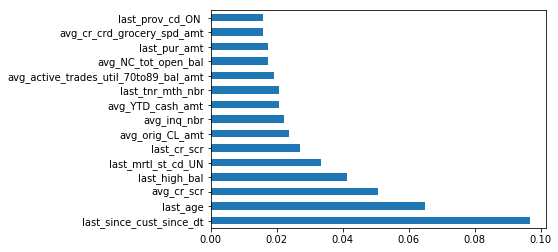

In [247]:
#plot = plot_importance(best_classifier, max_num_features=15)
features_plot = pd.Series(best_classifier.feature_importances_, index=X_test.columns).nlargest(15).plot(kind='barh')

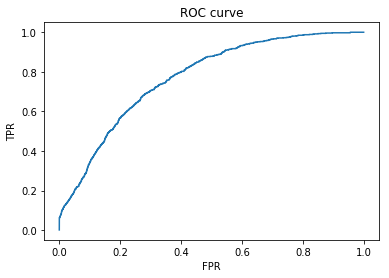

In [248]:
#ROC Curve: Test
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_test[:,1])

plt.clf()
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

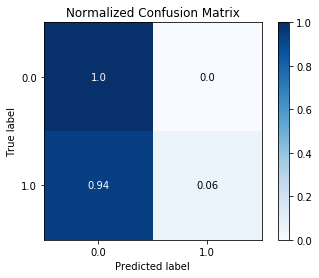

In [249]:
cm = skplt.metrics.plot_confusion_matrix(y_test, y_pred_test, normalize=True)

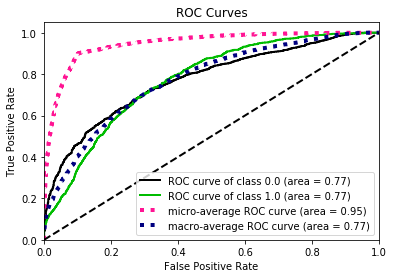

In [250]:
# skplt.metrics.plot_confusion_matrix(y_test, y_pred_test, normalize=True)
rc = skplt.metrics.plot_roc(y_test, y_pred_prob_test)
# skplt.metrics.plot_ks_statistic(y_test, y_pred_prob_test)
# skplt.metrics.plot_precision_recall(y_test, y_pred_prob_test)
# skplt.metrics.plot_cumulative_gain(y_test, y_pred_prob_test)
# skplt.metrics.plot_lift_curve(y_test, y_pred_prob_test)

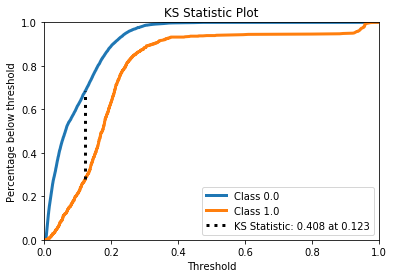

In [251]:
skplt.metrics.plot_ks_statistic(y_test, y_pred_prob_test)
plt.show()

In [252]:
confusion_matrix(y_test, y_pred_test)

array([[6032,    1],
       [ 680,   44]])

In [253]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_test).ravel()
print('True Positive:', commas(tp),'\nFalse Positive:', commas(fp), '\nTrue Negative:', 
      commas(tn),'\nFalse Negative:', commas(fn))

True Positive: 44 
False Positive: 1 
True Negative: 6,032 
False Negative: 680


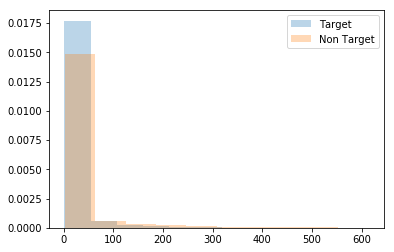

In [254]:
target = data.loc[ data['target'] == 1,'last_since_cust_since_dt']/30
nontarget=  data.loc[ data['target'] == 0,'last_since_cust_since_dt']/30

kwargs = dict(histtype='stepfilled', alpha=0.3, normed=True, bins=10)

plt.hist(target, label = 'Target', **kwargs)
plt.hist(nontarget, label = 'Non Target', **kwargs)
plt.legend();

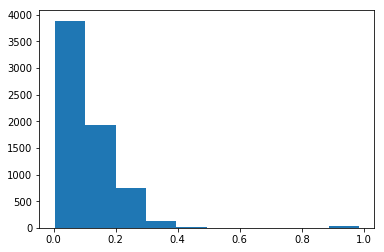

In [255]:
plt.hist(y_pred_prob_test[:,1], histtype='stepfilled', bins=10);

In [256]:
y_pred_prob_test[:,1]

array([0.06758758, 0.01710153, 0.22472692, ..., 0.23369978, 0.21253937,
       0.9569775 ], dtype=float32)

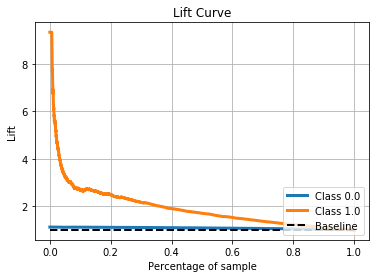

In [257]:
skplt.metrics.plot_lift_curve(y_test, y_pred_prob_test);

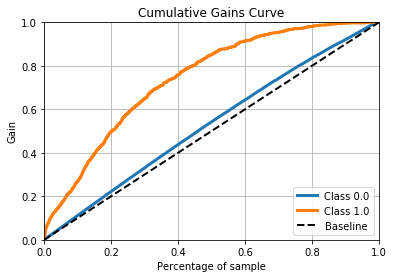

In [258]:
skplt.metrics.plot_cumulative_gain(y_test, y_pred_prob_test);

In [259]:
# Hypothesis: maybe non target doesnt have any spend?
# Yearly metric is not a good one, because low tenure have not been with us for a full year

all_data.groupby(['target']).mean()[['YTD_pur_amt']]

check = all_data.loc[all_data['YTD_pur_amt']<100,:]
check.groupby(['target']).count()[['cad_ip_id']]

,cad_ip_id
target,
0.0,29822
1.0,1546


In [260]:
# Hypothesis: maybe non target doesnt have any adb?

all_data.groupby(['target']).mean()[['ADB_amt']]

check = all_data.loc[all_data['ADB_amt']<50,:]
check.groupby(['target']).count()[['cad_ip_id']]

,cad_ip_id
target,
0.0,30817
1.0,1664
